In [24]:
import pandas as pd

In [62]:
# teams = ['purdue', 'arizona', 'houston', 'duke', 'connecticut', 'louisville', 'michigan', 'alabama', 'brigham-young', 'florida', 'michigan-state', 'gonzaga', 'illinois', 'st-johns-ny', 'iowa-state', 'north-carolina', 'tennessee', 'ucla', 'kentucky', 'texas-tech', 'auburn', 'arkansas', 'north-carolina-state', 'vanderbilt', 'indiana']
# teams

In [63]:
poll = pd.read_html('https://www.sports-reference.com/cbb/seasons/men/2026-polls.html')

In [27]:
top25 = poll[0]
top25

,Rk,School,Prev,Chng,Conf
0,1,Purdue,1.0,-,Big Ten
1,2,Arizona,4.0,2,Big 12
2,3,Houston,2.0,1,Big 12
3,4,Duke,5.0,1,ACC
4,5,Connecticut,3.0,2,Big East
5,6,Louisville,6.0,-,ACC
6,7,Michigan,7.0,-,Big Ten
7,8,Alabama,11.0,3,SEC
8,9,Brigham Young,9.0,-,Big 12
9,10,Florida,10.0,-,SEC


In [28]:
top_alltime = poll[1]
top_alltime.columns = top_alltime.columns.get_level_values(-1)
top_alltime


,School,Conf,Pre,11/10,11/17,11/24
0,Purdue,Big Ten,1,2,1,1
1,Arizona,Big 12,13,5,4,2
2,Houston,Big 12,2,1,2,3
3,Duke,ACC,6,4,5,4
4,UConn,Big East,4,3,3,5
5,Louisville,ACC,11,12,6,6
6,Michigan,Big Ten,7,6,7,7
7,Alabama,SEC,15,8,11,8
8,BYU,Big 12,8,7,9,9
9,Florida,SEC,3,10,10,10


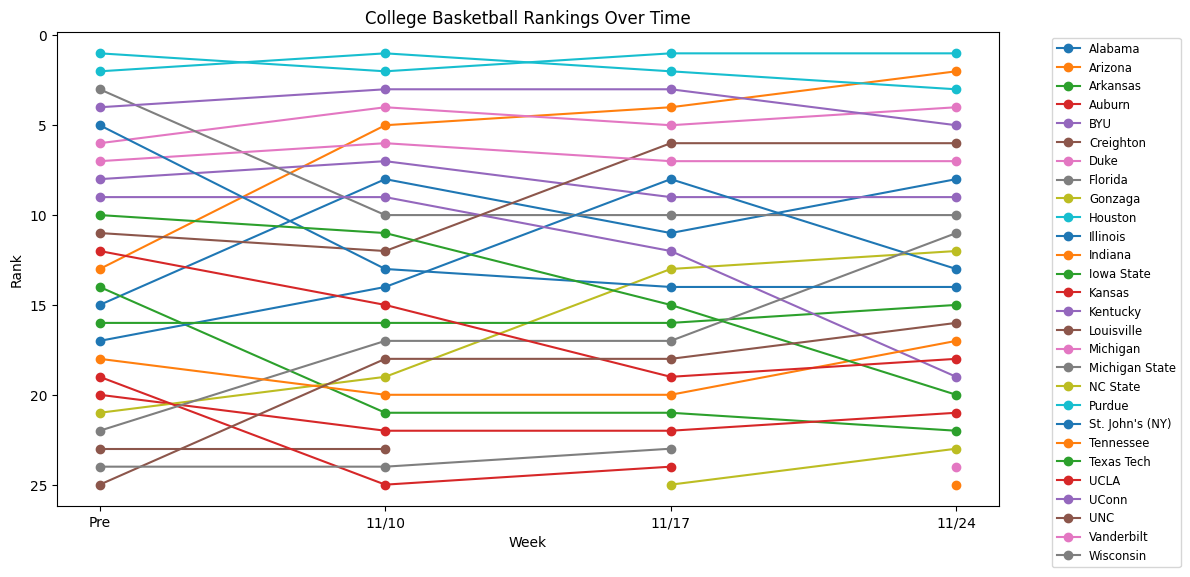

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Example: assuming your data is already loaded into df ---
# Clean up: drop rows where School is NaN or equals 'School'
top_alltime = top_alltime.dropna(subset=['School'])
top_alltime = top_alltime[top_alltime['School'] != 'School']

# Reshape into tidy format
tidy = top_alltime.melt(
    id_vars=['School', 'Conf'],
    value_vars=['Pre', '11/10', '11/17', '11/24'],
    var_name='Week',
    value_name='Rank'
)

# Convert Rank to numeric (some may be NaN)
tidy['Rank'] = pd.to_numeric(tidy['Rank'], errors='coerce')

# Plot
plt.figure(figsize=(12, 6))
for school, group in tidy.groupby('School'):
    plt.plot(group['Week'], group['Rank'], marker='o', label=school)

plt.gca().invert_yaxis()  # rank 1 at the top
plt.xlabel('Week')
plt.ylabel('Rank')
plt.title('College Basketball Rankings Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()


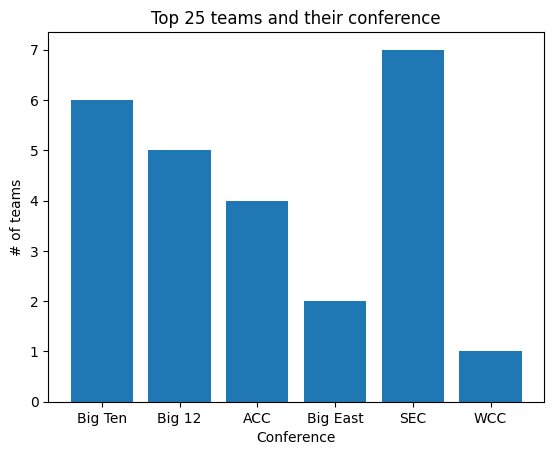

In [31]:
d_conference = {}
for conference in top25['Conf'].to_list():
    if conference in d_conference:
        d_conference[conference] += 1
    else:
        d_conference[conference] = 1
keys = list(d_conference.keys())
values = list(d_conference.values())

# 3. Create the bar plot
plt.bar(keys, values)

# 4. Add labels and title
plt.xlabel("Conference")
plt.ylabel("# of teams")
plt.title("Top 25 teams and their conference")

# 5. Show the plot
plt.show()

In [39]:
def get_link(school):
    link = f'https://www.sports-reference.com/cbb/schools/{school}/men/2026.html'
    return link


total_schools = []
for school in top25['School'].to_list():
    temp = school.lower()
    temp = temp.replace(" ", "-")
    if "john's" in temp:
        total_schools.append("st-johns-ny")
    else:
        total_schools.append(temp)

for college in total_schools:
    print(get_link(college))

https://www.sports-reference.com/cbb/schools/purdue/men/2026.html
https://www.sports-reference.com/cbb/schools/arizona/men/2026.html
https://www.sports-reference.com/cbb/schools/houston/men/2026.html
https://www.sports-reference.com/cbb/schools/duke/men/2026.html
https://www.sports-reference.com/cbb/schools/connecticut/men/2026.html
https://www.sports-reference.com/cbb/schools/louisville/men/2026.html
https://www.sports-reference.com/cbb/schools/michigan/men/2026.html
https://www.sports-reference.com/cbb/schools/alabama/men/2026.html
https://www.sports-reference.com/cbb/schools/brigham-young/men/2026.html
https://www.sports-reference.com/cbb/schools/florida/men/2026.html
https://www.sports-reference.com/cbb/schools/michigan-state/men/2026.html
https://www.sports-reference.com/cbb/schools/gonzaga/men/2026.html
https://www.sports-reference.com/cbb/schools/illinois/men/2026.html
https://www.sports-reference.com/cbb/schools/st-johns-ny/men/2026.html
https://www.sports-reference.com/cbb/sch

In [72]:
duke_dfs = pd.read_html('https://www.sports-reference.com/cbb/schools/duke/men/2026.html')

In [73]:
# Roster
duke_dfs[0]

,Player,#,Class,Pos,Height,Weight,Hometown,High School,RSCI Top 100,Summary
0,Cameron Boozer,12,FR,F,6-9,250.0,"Miami, FL",Columbus (FL),3 (2025),"22.9 Pts, 9.8 Reb, 3.9 Ast"
1,Patrick Ngongba,21,SO,C,6-11,250.0,"Manassas, VA",St. Paul VI (VA),24 (2024),"12.8 Pts, 6.5 Reb, 2.3 Ast"
2,Isaiah Evans,3,SO,G,6-6,175.0,"Fayetteville, NC",North Mecklenburg (NC),16 (2024),"12.5 Pts, 3.6 Reb, 1.9 Ast"
3,Caleb Foster,1,JR,G,6-5,197.0,"Sherman Oaks, CA",Oak Hill Academy (VA); Notre Dame (Sherman Oak...,17 (2023),"9.3 Pts, 3.3 Reb, 3.1 Ast"
4,Dame Sarr,7,FR,G,6-8,190.0,"Oderzo, Italy",Orange1 Basket Bassano (Italy); FC Barcelona (...,81 (2025),"7.5 Pts, 4.1 Reb, 1.0 Ast"
5,Nikolas Khamenia,14,FR,G,6-8,215.0,"Los Angeles, CA",Harvard-Westlake (CA),16 (2025),"7.0 Pts, 4.1 Reb, 2.3 Ast"
6,Cayden Boozer,2,FR,G,6-4,205.0,"Denver, FL",Columbus (FL),19 (2025),"6.5 Pts, 2.8 Reb, 3.5 Ast"
7,Maliq Brown,6,SR,F,6-8,213.0,"Culpeper, VA",Blue Ridge (VA),NaN,"5.9 Pts, 3.5 Reb, 1.1 Ast"
8,Darren Harris,8,SO,G,6-6,203.0,"Herndon, VA",St. Paul VI (VA),35 (2024),"5.8 Pts, 1.0 Reb, 1.0 Ast"
9,Jack Scott,20,SR,G,6-6,195.0,"Denver, CO",Hun School (NJ),NaN,"1.2 Pts, 1.4 Reb, 0.2 Ast"


In [74]:
# Per Game Team and Opponents Stats
duke_dfs[1]

,Unnamed: 0,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Team,8.0,40.0,31.4,60.4,.520,20.9,32.0,.652,10.5,...,.723,12.3,30.9,43.1,20.3,7.5,4.3,10.3,17.4,91.9
1,Rank,NaN,NaN,33rd,173rd,17th,103rd,294th,3rd,39th,...,147th,133rd,13th,28th,12th,157th,85th,54th,138th,22nd
2,Opponent,8.0,40.0,20.8,61.0,.340,13.5,33.1,.408,7.3,...,.684,10.8,19.5,30.3,12.1,6.5,1.9,14.3,20.4,58.8
3,Rank,NaN,NaN,12th,245th,1st,11th,105th,8th,139th,...,95th,185th,15th,30th,105th,136th,17th,100th,70th,2nd


In [75]:
#Total Team and Opponent Stats
duke_dfs[2]

,Unnamed: 0,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Team,8.0,1600.0,251,483,.520,167,256,.652,84,...,.723,98,247,345,162,60,34,82,139,735
1,Rank,NaN,NaN,12th,65th,17th,44th,203rd,3rd,21st,...,147th,72nd,6th,12th,4th,96th,57th,129th,242nd,10th
2,Opponent,8.0,1600.0,166,488,.340,108,265,.408,58,...,.684,86,156,242,97,52,15,114,163,470
3,Rank,NaN,NaN,92nd,321st,1st,61st,223rd,8th,215th,...,95th,252nd,97th,148th,195th,212th,30th,53rd,37th,75th


In [76]:
# Pre Game Statistics
duke_dfs[3]

,Rk,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,Cameron Boozer,F,8,8,29.0,7.9,13.6,0.578,1.5,...,3.0,6.8,9.8,3.9,1.8,1.1,1.3,1.5,22.9,NaN
1,2.0,Patrick Ngongba,C,8,8,22.8,4.6,6.9,0.673,0.3,...,2.5,4.0,6.5,2.3,0.5,1.1,1.8,2.9,12.8,NaN
2,3.0,Isaiah Evans,G,8,8,24.9,3.9,9.5,0.408,2.4,...,0.6,3.0,3.6,1.9,0.5,0.9,0.8,1.8,12.5,NaN
3,4.0,Caleb Foster,G,8,8,23.5,3.3,6.5,0.500,1.5,...,0.4,2.9,3.3,3.1,0.5,0.0,1.5,1.9,9.3,NaN
4,5.0,Dame Sarr,G,8,8,20.9,2.5,5.6,0.444,1.3,...,0.8,3.4,4.1,1.0,1.6,0.3,1.0,1.8,7.5,NaN
5,6.0,Nikolas Khamenia,G,8,0,21.0,2.4,4.8,0.500,1.3,...,1.4,2.8,4.1,2.3,0.3,0.0,1.3,1.6,7.0,NaN
6,7.0,Cayden Boozer,G,8,0,20.4,1.9,4.1,0.455,0.6,...,0.3,2.5,2.8,3.5,1.0,0.3,1.0,1.8,6.5,NaN
7,8.0,Maliq Brown,F,8,0,16.3,2.6,3.5,0.750,0.1,...,1.0,2.5,3.5,1.1,0.9,0.5,1.3,2.3,5.9,NaN
8,9.0,Darren Harris,G,8,0,13.6,1.6,3.8,0.433,1.3,...,0.1,0.9,1.0,1.0,0.4,0.0,0.1,1.0,5.8,NaN
9,10.0,Jack Scott,G,5,0,3.8,0.4,0.6,0.667,0.4,...,0.6,0.8,1.4,0.2,0.2,0.0,0.2,0.2,1.2,NaN


In [77]:
# Total Stats
duke_dfs[4]

,Rk,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,Cameron Boozer,F,8,8,232,63,109,0.578,12,...,24,54,78,31,14,9,10,12,183,NaN
1,2.0,Patrick Ngongba,C,8,8,182,37,55,0.673,2,...,20,32,52,18,4,9,14,23,102,NaN
2,3.0,Isaiah Evans,G,8,8,199,31,76,0.408,19,...,5,24,29,15,4,7,6,14,100,NaN
3,4.0,Caleb Foster,G,8,8,188,26,52,0.500,12,...,3,23,26,25,4,0,12,15,74,NaN
4,5.0,Dame Sarr,G,8,8,167,20,45,0.444,10,...,6,27,33,8,13,2,8,14,60,NaN
5,6.0,Nikolas Khamenia,G,8,0,168,19,38,0.500,10,...,11,22,33,18,2,0,10,13,56,NaN
6,7.0,Cayden Boozer,G,8,0,163,15,33,0.455,5,...,2,20,22,28,8,2,8,14,52,NaN
7,8.0,Maliq Brown,F,8,0,130,21,28,0.750,1,...,8,20,28,9,7,4,10,18,47,NaN
8,9.0,Darren Harris,G,8,0,109,13,30,0.433,10,...,1,7,8,8,3,0,1,8,46,NaN
9,10.0,Jack Scott,G,5,0,19,2,3,0.667,2,...,3,4,7,1,1,0,1,1,6,NaN


In [81]:
# Per 40 minutes stats
duke_dfs[5]

,Rk,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1,Cameron Boozer,F,8,8,232,10.9,18.8,0.578,2.1,...,4.1,9.3,13.4,5.3,2.4,1.6,1.7,2.1,31.6,NaN
1,2,Isaiah Evans,G,8,8,199,6.2,15.3,0.408,3.8,...,1.0,4.8,5.8,3.0,0.8,1.4,1.2,2.8,20.1,NaN
2,3,Caleb Foster,G,8,8,188,5.5,11.1,0.500,2.6,...,0.6,4.9,5.5,5.3,0.9,0.0,2.6,3.2,15.7,NaN
3,4,Patrick Ngongba,C,8,8,182,8.1,12.1,0.673,0.4,...,4.4,7.0,11.4,4.0,0.9,2.0,3.1,5.1,22.4,NaN
4,5,Nikolas Khamenia,G,8,0,168,4.5,9.0,0.500,2.4,...,2.6,5.2,7.9,4.3,0.5,0.0,2.4,3.1,13.3,NaN
5,6,Dame Sarr,G,8,8,167,4.8,10.8,0.444,2.4,...,1.4,6.5,7.9,1.9,3.1,0.5,1.9,3.4,14.4,NaN
6,7,Cayden Boozer,G,8,0,163,3.7,8.1,0.455,1.2,...,0.5,4.9,5.4,6.9,2.0,0.5,2.0,3.4,12.8,NaN
7,8,Maliq Brown,F,8,0,130,6.5,8.6,0.750,0.3,...,2.5,6.2,8.6,2.8,2.2,1.2,3.1,5.5,14.5,NaN
8,9,Darren Harris,G,8,0,109,4.8,11.0,0.433,3.7,...,0.4,2.6,2.9,2.9,1.1,0.0,0.4,2.9,16.9,NaN
9,10,Ifeanyi Ufochukwu,C,5,0,22,3.6,7.3,0.500,0.0,...,3.6,1.8,5.5,0.0,0.0,1.8,3.6,10.9,7.3,NaN


In [82]:
# Per 100 stats
duke_dfs[6]

,Rk,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,...,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,Awards
0,1,Cameron Boozer,F,8,8,232,15.3,26.5,0.578,2.9,...,18.9,7.5,3.4,2.2,2.4,2.9,44.4,148.0,76.1,NaN
1,2,Isaiah Evans,G,8,8,199,8.8,21.5,0.408,5.4,...,8.2,4.2,1.1,2.0,1.7,4.0,28.3,131.6,87.3,NaN
2,3,Caleb Foster,G,8,8,188,7.8,15.6,0.500,3.6,...,7.8,7.5,1.2,0.0,3.6,4.5,22.2,123.6,89.0,NaN
3,4,Patrick Ngongba,C,8,8,182,11.4,17.0,0.673,0.6,...,16.1,5.6,1.2,2.8,4.3,7.1,31.6,139.0,83.1,NaN
4,5,Nikolas Khamenia,G,8,0,168,6.4,12.7,0.500,3.4,...,11.1,6.0,0.7,0.0,3.4,4.4,18.8,126.4,89.7,NaN
5,6,Dame Sarr,G,8,8,167,6.7,15.2,0.444,3.4,...,11.1,2.7,4.4,0.7,2.7,4.7,20.2,112.6,78.9,NaN
6,7,Cayden Boozer,G,8,0,163,5.2,11.4,0.455,1.7,...,7.6,9.7,2.8,0.7,2.8,4.8,18.0,134.3,84.7,NaN
7,8,Maliq Brown,F,8,0,130,9.1,12.1,0.750,0.4,...,12.1,3.9,3.0,1.7,4.3,7.8,20.4,122.4,81.2,NaN
8,9,Darren Harris,G,8,0,109,6.7,15.5,0.433,5.2,...,4.1,4.1,1.6,0.0,0.5,4.1,23.8,146.0,91.2,NaN
9,10,Ifeanyi Ufochukwu,C,5,0,22,5.1,10.2,0.500,0.0,...,7.7,0.0,0.0,2.6,5.1,15.4,10.2,76.9,92.3,NaN


In [84]:
schedule = pd.read_html('https://www.sports-reference.com/cbb/schools/duke/men/2026-schedule.html')

In [ ]:
# AP polls
schedule[0]

,School,Pre,11/10,11/17,11/24
0,Duke,6,4,5,4


In [87]:
# Schedule and Results
schedule[1]

,G,Date,Time,Type,Unnamed: 4,Opponent,Conf,SRS,Unnamed: 8,Tm,Opp,OT,W,L,Streak,Arena
0,1,"Tue, Nov 4, 2025",8:45p,REG,N,Texas,SEC,12.31,W,75.0,60.0,NaN,1.0,0.0,W 1,Spectrum Center
1,2,"Sat, Nov 8, 2025",1:30p,REG,NaN,Western Carolina,Southern,-12.99,W,95.0,54.0,NaN,2.0,0.0,W 2,Cameron Indoor Stadium
2,3,"Tue, Nov 11, 2025",7:00p,REG,@,Army,Patriot,-18.99,W,114.0,59.0,NaN,3.0,0.0,W 3,Christl Arena
3,4,"Fri, Nov 14, 2025",7:00p,REG,NaN,Indiana State,MVC,-9.06,W,100.0,62.0,NaN,4.0,0.0,W 4,Cameron Indoor Stadium
4,5,"Tue, Nov 18, 2025",9:00p,REG,N,Kansas (24),Big 12,20.86,W,78.0,66.0,NaN,5.0,0.0,W 5,Madison Square Garden (IV)
5,6,"Fri, Nov 21, 2025",7:00p,REG,NaN,Niagara,MAAC,-19.90,W,100.0,42.0,NaN,6.0,0.0,W 6,Cameron Indoor Stadium
6,7,"Sun, Nov 23, 2025",4:00p,REG,NaN,Howard,MEAC,-10.61,W,93.0,56.0,NaN,7.0,0.0,W 7,Cameron Indoor Stadium
7,8,"Thu, Nov 27, 2025",8:00p,REG,N,Arkansas (22),SEC,17.71,W,80.0,71.0,NaN,8.0,0.0,W 8,United Center
8,9,"Tue, Dec 2, 2025",7:30p,REG,NaN,Florida (10),SEC,22.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cameron Indoor Stadium
9,10,"Sat, Dec 6, 2025",NaN,REG,@,Michigan State (11),Big Ten,21.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Breslin Events Center


In [91]:
gamelog = pd.read_html('https://www.sports-reference.com/cbb/schools/duke/men/2026-gamelogs.html')
gamelog[0]

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                   Rk                Gtm               Date   
0                 1.0                1.0         2025-11-04   
1                 2.0                2.0         2025-11-08   
2                 3.0                3.0         2025-11-11   
3                 4.0                4.0         2025-11-14   
4                 5.0                5.0         2025-11-18   
5                 6.0                6.0         2025-11-21   
6                 7.0                7.0         2025-11-23   
7                 8.0                8.0         2025-11-27   
8                 9.0                NaN         2025-12-02   
9                10.0                NaN         2025-12-06   
10               11.0                NaN         2025-12-16   
11               12.0                NaN         2025-12-20   
12               13.0                NaN         2026-02-21   
13                NaN                NaN                NaN   

   Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0 Score         \
   Unnamed: 3_level_1                Opp               Type  Rslt     Tm   
0                   N              Texas     REG (Non-Conf)     W   75.0   
1                 NaN   Western Carolina     REG (Non-Conf)     W   95.0   
2                   @               Army     REG (Non-Conf)     W  114.0   
3                 NaN      Indiana State     REG (Non-Conf)     W  100.0   
4                   N             Kansas     REG (Non-Conf)     W   78.0   
5                 NaN            Niagara     REG (Non-Conf)     W  100.0   
6                 NaN             Howard     REG (Non-Conf)     W   93.0   
7                   N           Arkansas     REG (Non-Conf)     W   80.0   
8                 NaN            Florida     REG (Non-Conf)   NaN    NaN   
9                   @     Michigan State     REG (Non-Conf)   NaN    NaN   
10                NaN           Lipscomb     REG (Non-Conf)   NaN    NaN   
11                  N         Texas Tech     REG (Non-Conf)   NaN    NaN   
12                  N           Michigan     REG (Non-Conf)   NaN    NaN   
13                NaN                NaN                NaN   8-0  735.0   

               ... Opponent                                               \
      Opp  OT  ...      FTA    FT%   ORB    DRB    TRB   AST   STL   BLK   
0    60.0 NaN  ...     23.0  0.739  17.0   21.0   38.0   6.0   4.0   2.0   
1    54.0 NaN  ...     11.0  0.545  13.0   27.0   40.0   9.0   8.0   1.0   
2    59.0 NaN  ...      7.0  0.714   8.0   17.0   25.0  13.0   6.0   0.0   
3    62.0 NaN  ...     15.0  0.600   8.0   14.0   22.0  14.0  11.0   1.0   
4    66.0 NaN  ...     14.0  0.714   8.0   21.0   29.0  15.0   5.0   4.0   
5    42.0 NaN  ...     15.0  0.600   6.0   13.0   19.0  11.0   4.0   2.0   
6    56.0 NaN  ...     21.0  0.714   6.0   16.0   22.0  12.0   6.0   2.0   
7    71.0 NaN  ...     11.0  0.818   9.0   17.0   26.0  17.0   8.0   3.0   
8     NaN NaN  ...      NaN    NaN   NaN    NaN    NaN   NaN   NaN   NaN   
9     NaN NaN  ...      NaN    NaN   NaN    NaN    NaN   NaN   NaN   NaN   
10    NaN NaN  ...      NaN    NaN   NaN    NaN    NaN   NaN   NaN   NaN   
11    NaN NaN  ...      NaN    NaN   NaN    NaN    NaN   NaN   NaN   NaN   
12    NaN NaN  ...      NaN    NaN   NaN    NaN    NaN   NaN   NaN   NaN   
13  470.0 NaN  ...    117.0  0.684  75.0  146.0  221.0  97.0  52.0  15.0   

                  
      TOV     PF  
0    16.0   25.0  
1    13.0   23.0  
2    14.0   22.0  
3    18.0   17.0  
4     7.0   22.0  
5    16.0   16.0  
6    12.0   20.0  
7    11.0   18.0  
8     NaN    NaN  
9     NaN    NaN  
10    NaN    NaN  
11    NaN    NaN  
12    NaN    NaN  
13  107.0  163.0  

[14 rows x 52 columns]

In [92]:
starting_lineup = pd.read_html('https://www.sports-reference.com/cbb/schools/duke/men/2026-starters.html#site_menu_link')

In [93]:
# Starting lineups
starting_lineup[0]

,G,Date,Unnamed: 2,Unnamed: 3,Unnamed: 4,Opponent,Unnamed: 6,OT,Tm,Opp,W,L,Unnamed: 12
0,1,"Tue, Nov 4, 2025",NaN,Box Score,N,Texas,W,NaN,75,60,1,0,C. Boozer · I. Evans · C. Foster · P. Ngongba ...
1,2,"Sat, Nov 8, 2025",NaN,Box Score,NaN,Western Carolina,W,NaN,95,54,2,0,C. Boozer · I. Evans · C. Foster · P. Ngongba ...
2,3,"Tue, Nov 11, 2025",NaN,Box Score,@,Army,W,NaN,114,59,3,0,C. Boozer · I. Evans · C. Foster · P. Ngongba ...
3,4,"Fri, Nov 14, 2025",NaN,Box Score,NaN,Indiana State,W,NaN,100,62,4,0,C. Boozer · I. Evans · C. Foster · P. Ngongba ...
4,5,"Tue, Nov 18, 2025",NaN,Box Score,N,Kansas,W,NaN,78,66,5,0,C. Boozer · I. Evans · C. Foster · P. Ngongba ...
5,6,"Fri, Nov 21, 2025",NaN,Box Score,NaN,Niagara,W,NaN,100,42,6,0,C. Boozer · I. Evans · C. Foster · P. Ngongba ...
6,7,"Sun, Nov 23, 2025",NaN,Box Score,NaN,Howard,W,NaN,93,56,7,0,C. Boozer · I. Evans · C. Foster · P. Ngongba ...
7,8,"Thu, Nov 27, 2025",NaN,Box Score,N,Arkansas,W,NaN,80,71,8,0,C. Boozer · I. Evans · C. Foster · P. Ngongba ...


In [94]:
# Record for the different starting lineups
starting_lineup[1]

,G,W,L,W-L%,Unnamed: 4
0,8,8,0,1.0,C. Boozer · I. Evans · C. Foster · P. Ngongba ...
